Best accuracy: 1.00 with k=1

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



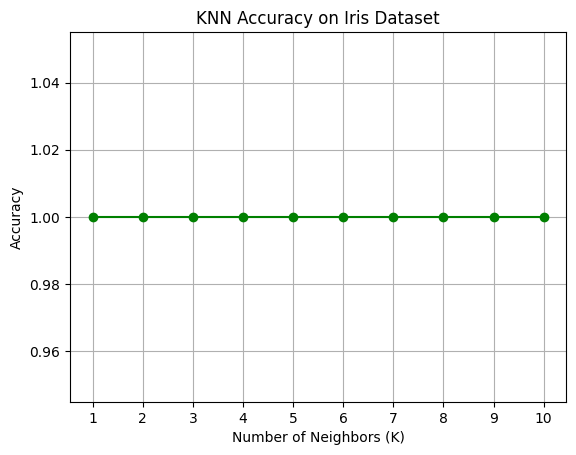

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# --- Step 1: Load Iris Dataset ---
iris = load_iris()
X = iris.data  # features: sepal/petal length & width
y = iris.target  # target labels (0=setosa, 1=versicolor, 2=virginica)

# --- Step 2: Split Dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Step 3: KNN Model Evaluation ---
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

# --- Step 4: Best Model ---
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best accuracy: {max(accuracies):.2f} with k={best_k}")

# --- Step 5: Classification Report ---
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
final_preds = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, final_preds, target_names=iris.target_names))

# --- Step 6: Accuracy vs K Plot ---
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='green')
plt.title("KNN Accuracy on Iris Dataset")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.show()
